In [ ]:
# Import Libraries for Data Analysis and Clustering  

import numpy as np  # For numerical operations  
import pandas as pd  # For data manipulation  
import matplotlib.pyplot as plt  # For visualization  
from matplotlib.colors import ListedColormap  # For custom colormap  
from sklearn.cluster import KMeans  # For K-Means clustering  

In [ ]:
# Load Dataset and Preview Data  

blobs = pd.read_csv('iris.csv') # Load the Iris dataset from CSV  
colnames = ['petal_length', 'petal_width'] # Define the columns to use  
blobs.head()# Display the first 5 rows  

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Apply K-Means Clustering  

kmeans = KMeans(n_clusters=3)  # Initialize K-Means with 3 clusters  
blobs['cluster'] = kmeans.fit_predict(blobs[colnames])  # Assign clusters to data  

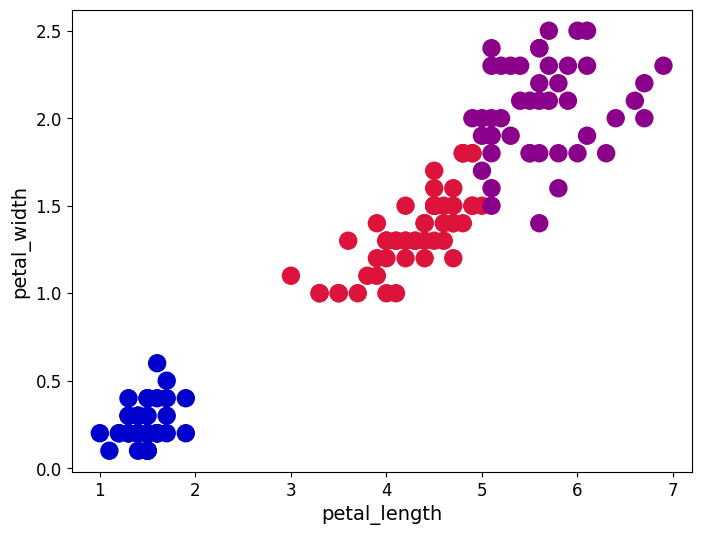

In [ ]:
# Visualize Clustering Results  
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"]) # Define cluster colors  

fig, ax = plt.subplots(figsize=(8, 6)) # Create a figure (8x6)  
plt.scatter(x=blobs['petal_length'], y=blobs['petal_width'], s=150,
            c=blobs['cluster'].astype('category'), 
            cmap = customcmap) # Scatter plot with cluster colors  
ax.set_xlabel(r'petal_length', fontsize=14)  # X-axis label  
ax.set_ylabel(r'petal_width', fontsize=14)  # Y-axis label  
plt.xticks(fontsize=12) # Set font size for X ticks  
plt.yticks(fontsize=12) # Set font size for Y ticks  

plt.show() # Display the plot  

In [5]:
def initiate_centroids(k, dset):
    '''
    Select k data points as centroids
    k: number of centroids
    dset: pandas dataframe
    '''
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=3
df = blobs[['petal_length','petal_width']]
centroids = initiate_centroids(k, df)
centroids

,petal_length,petal_width
73,4.7,1.2
18,1.7,0.3
118,6.9,2.3


In [6]:
def rsserr(a,b):
    '''
    Calculate the root of sum of squared errors. 
    a and b are numpy arrays
    '''
    return np.square(np.sum((a-b)**2)) 

In [7]:
for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

Error for centroid 0: 157.75
Error for centroid 1: 0.03
Error for centroid 2: 1279.49


In [8]:
def centroid_assignation(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `centroids`, we assign each
    data point in `dset` to a centroid. 
    - dset - pandas dataframe with observations
    - centroids - pa das dataframe with centroids
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

In [9]:
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12504\3199595029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'] = centroid_assignation(df, centroids)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12504\3199595029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'] = centroid_assignation(df, centroids)


,petal_length,petal_width,centroid,error
0,1.4,0.2,1,0.0100
1,1.4,0.2,1,0.0100
2,1.3,0.2,1,0.0289
3,1.5,0.2,1,0.0025
4,1.4,0.2,1,0.0100


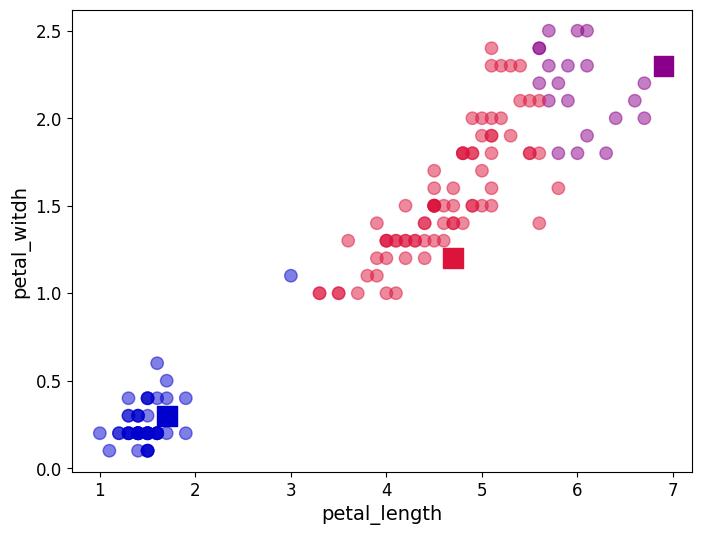

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap)
ax.set_xlabel(r'petal_length', fontsize=14)
ax.set_ylabel(r'petal_witdh', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [11]:
print("The total error is {0:.2f}".format(df['error'].sum()))

The total error is 80.36


In [12]:
centroids = df.groupby('centroid').agg('mean').loc[:, colnames].reset_index(drop = True)
centroids

,petal_length,petal_width
0,4.620513,1.548718
1,1.494118,0.260784
2,6.057143,2.176190


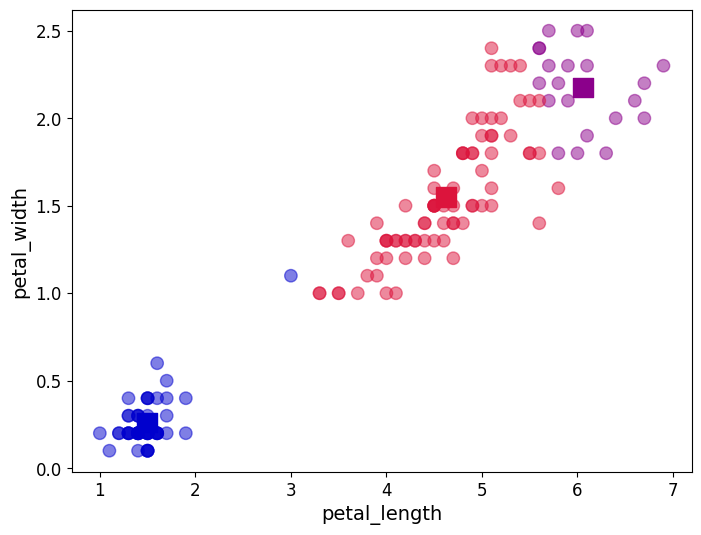

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200,
            c=[0, 1, 2], cmap = customcmap)
ax.set_xlabel(r'petal_length', fontsize=14)
ax.set_ylabel(r'petal_width', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [14]:
def kmeans(dset, k=2, tol=1e-4):
    '''
    K-means implementationd for a 
    `dset`:  DataFrame with observations
    `k`: number of clusters, default k=2
    `tol`: tolerance=1E-4
    '''
    # Let us work in a copy, so we don't mess the original
    working_dset = dset.copy()
    # We define some variables to hold the error, the 
    # stopping signal and a counter for the iterations
    err = []
    goahead = True
    j = 0
    
    # Step 2: Initiate clusters by defining centroids 
    centroids = initiate_centroids(k, dset)

    while(goahead):
        # Step 3 and 4 - Assign centroids and calculate error
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids) 
        err.append(sum(j_err))
        
        # Step 5 - Update centroid position
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

        # Step 6 - Restart the iteration
        if j>0:
            # Is the error less than a tolerance (1E-4)
            if err[j-1]-err[j]<=tol:
                goahead = False
        j+=1

    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids

In [15]:
np.random.seed(42)
df['centroid'], df['error'], centroids = kmeans(df[['petal_length','petal_width']], 3)
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12504\3932563320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'], centroids = kmeans(df[['petal_length','petal_width']], 3)


,petal_length,petal_width,centroid,error
0,1.4,0.2,1,0.000036
1,1.4,0.2,1,0.000036
2,1.3,0.2,1,0.000831
3,1.5,0.2,1,0.000010
4,1.4,0.2,1,0.000036


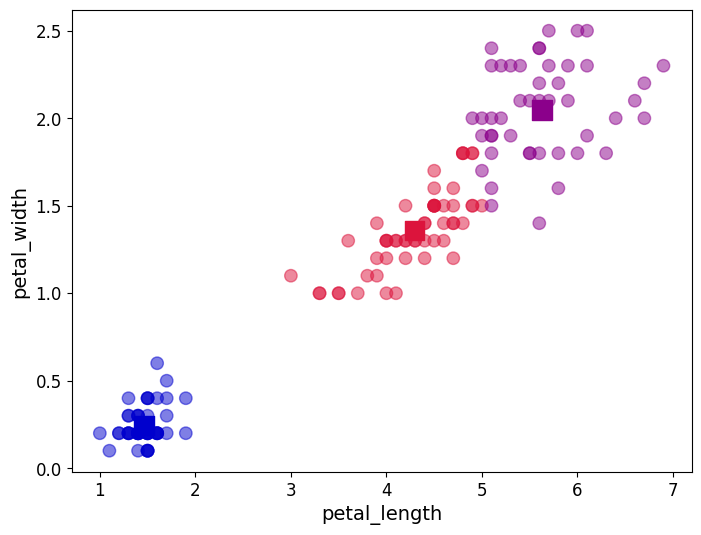

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap)
ax.set_xlabel(r'petal_length', fontsize=14)
ax.set_ylabel(r'petal_width', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

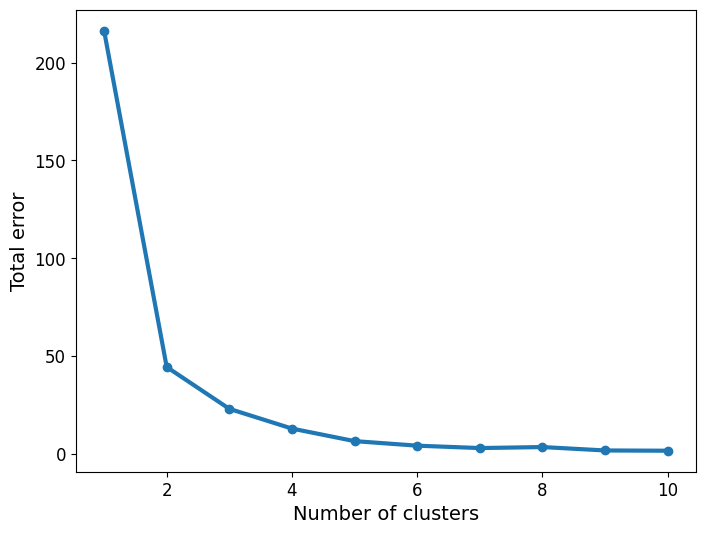

In [17]:
err_total = []
n = 10

df_elbow = blobs[['sepal_length','sepal_width']]

for i in range(n):
    _, my_errs, _ = kmeans(df_elbow, i+1)
    err_total.append(sum(my_errs))
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,n+1), err_total, linewidth=3, marker='o')
ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r'Total error', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()